In [49]:
import pandas as pd
import spacy
ner = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

# Load Dataset

In [50]:
df = pd.DataFrame(pd.read_csv('liar2/train.csv'))
df.head(3)

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."


## Convert label to binary

In [51]:
df['label_binary'] = df['label'].isin([3, 4, 5]).astype(int) 

df_true = df[df['label_binary'] == 1] # 3 4 5 true labels
df_false = df[df['label_binary'] == 0] # 0 1 2 false labels
print(df_true.shape[0])
print(df_false.shape[0])

7778
10591


## Plot the number of T/F

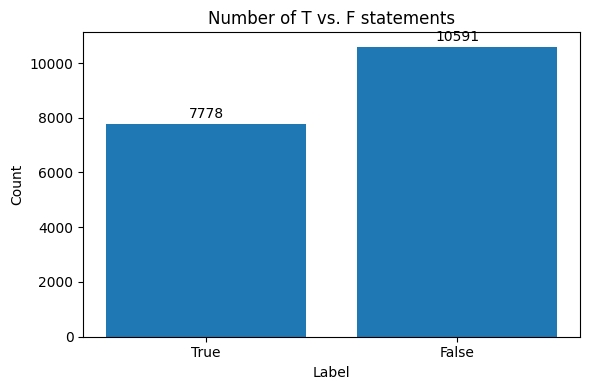

In [52]:
labels = ['True', 'False']
counts = [df_true.shape[0], df_false.shape[0]] # T/F counts

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Number of T vs. F statements')
plt.ylabel('Count')
plt.xlabel('Label')
plt.tight_layout()
plt.show()

## Statement examples

In [53]:
df = df[['label_binary', 'statement']] # keep only necessary cols
for i, row in df.head(5).iterrows():
    print(f"{row['label_binary']}, {row['statement']}\n")

1, 90 percent of Americans "support universal background checks" for gun purchases.

0, Last year was one of the deadliest years ever for law enforcement officers.

0, Bernie Sanders's plan is "to raise your taxes to 90 percent.

1, Voter ID is supported by an overwhelming majority of NYers, from all across the state, walks of life, & political parties.

0, Says Barack Obama "robbed Medicare (of) $716 billion to pay for ... Obamacare.



In [57]:
import spacy
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# --- spaCy ---
print("spaCy results:")
nlp_spacy = spacy.load("en_core_web_sm")
doc = nlp_spacy('90 percent of Americans "support universal background checks" for gun purchases.')
for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}")

# --- RoBERTa (via HuggingFace) ---
print("\nRoBERTa results:")
model_name = "Jean-Baptiste/roberta-large-ner-english"  # a fine-tuned RoBERTa NER model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

nlp_roberta = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")
sentence = '90 percent of Americans "support universal background checks" for gun purchases.'
roberta_ents = nlp_roberta(sentence)

for ent in roberta_ents:
    print(f"{ent['word']} -> {ent['entity_group']}")


spaCy results:
90 percent -> PERCENT
Americans -> NORP

RoBERTa results:


Device set to use cuda:0


 Americans -> MISC
